In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [38]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [35]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


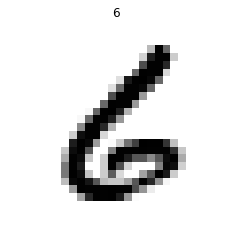

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

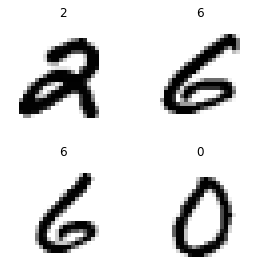

In [40]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [41]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [42]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [81]:
from models import Sequential
from layers import Linear, ReLU, Softmax, Tanh

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

In [82]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={"acc": categorical_accuracy})

model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot);

loss=2.409048	val_loss=2.410789	acc=0.089333	val_acc=0.098000


In [83]:
# train the model
model.train(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot, epochs=1000);

Epoch 01	loss=2.285307	val_loss=2.286160	acc=0.141667	val_acc=0.148000
Epoch 02	loss=2.206406	val_loss=2.208485	acc=0.220167	val_acc=0.225000
Epoch 03	loss=2.136187	val_loss=2.139702	acc=0.291000	val_acc=0.287000
Epoch 04	loss=2.068860	val_loss=2.073991	acc=0.350000	val_acc=0.344000
Epoch 05	loss=2.002884	val_loss=2.009919	acc=0.407000	val_acc=0.400000
Epoch 06	loss=1.937444	val_loss=1.946050	acc=0.461833	val_acc=0.454000
Epoch 07	loss=1.871540	val_loss=1.881852	acc=0.515833	val_acc=0.500000
Epoch 08	loss=1.804515	val_loss=1.816676	acc=0.554167	val_acc=0.537000
Epoch 09	loss=1.736094	val_loss=1.750587	acc=0.588000	val_acc=0.568000
Epoch 10	loss=1.666984	val_loss=1.684145	acc=0.618333	val_acc=0.595000
Epoch 11	loss=1.597966	val_loss=1.617647	acc=0.641833	val_acc=0.611000
Epoch 12	loss=1.530105	val_loss=1.551926	acc=0.662667	val_acc=0.635000
Epoch 13	loss=1.463819	val_loss=1.487616	acc=0.680833	val_acc=0.653000
Epoch 14	loss=1.399858	val_loss=1.425681	acc=0.697167	val_acc=0.671000
Epoch 

Epoch 118	loss=0.314020	val_loss=0.362965	acc=0.916500	val_acc=0.901000
Epoch 119	loss=0.312751	val_loss=0.361806	acc=0.916333	val_acc=0.903000
Epoch 120	loss=0.311500	val_loss=0.360645	acc=0.917000	val_acc=0.904000
Epoch 121	loss=0.310267	val_loss=0.359530	acc=0.917167	val_acc=0.904000
Epoch 122	loss=0.309051	val_loss=0.358403	acc=0.917333	val_acc=0.904000
Epoch 123	loss=0.307851	val_loss=0.357326	acc=0.917500	val_acc=0.904000
Epoch 124	loss=0.306667	val_loss=0.356249	acc=0.918000	val_acc=0.904000
Epoch 125	loss=0.305498	val_loss=0.355189	acc=0.918167	val_acc=0.904000
Epoch 126	loss=0.304341	val_loss=0.354154	acc=0.918667	val_acc=0.904000
Epoch 127	loss=0.303199	val_loss=0.353119	acc=0.918833	val_acc=0.904000
Epoch 128	loss=0.302072	val_loss=0.352128	acc=0.919000	val_acc=0.905000
Epoch 129	loss=0.300959	val_loss=0.351127	acc=0.919000	val_acc=0.905000
Epoch 130	loss=0.299859	val_loss=0.350170	acc=0.919000	val_acc=0.906000
Epoch 131	loss=0.298772	val_loss=0.349188	acc=0.919000	val_acc=0

Epoch 233	loss=0.225577	val_loss=0.291026	acc=0.939333	val_acc=0.919000
Epoch 234	loss=0.225069	val_loss=0.290660	acc=0.939833	val_acc=0.919000
Epoch 235	loss=0.224564	val_loss=0.290323	acc=0.940000	val_acc=0.919000
Epoch 236	loss=0.224060	val_loss=0.289968	acc=0.940167	val_acc=0.919000
Epoch 237	loss=0.223560	val_loss=0.289633	acc=0.940167	val_acc=0.919000
Epoch 238	loss=0.223061	val_loss=0.289282	acc=0.940167	val_acc=0.919000
Epoch 239	loss=0.222565	val_loss=0.288960	acc=0.940167	val_acc=0.919000
Epoch 240	loss=0.222071	val_loss=0.288612	acc=0.940167	val_acc=0.919000
Epoch 241	loss=0.221579	val_loss=0.288289	acc=0.940000	val_acc=0.919000
Epoch 242	loss=0.221089	val_loss=0.287953	acc=0.940167	val_acc=0.919000
Epoch 243	loss=0.220601	val_loss=0.287640	acc=0.940500	val_acc=0.919000
Epoch 244	loss=0.220115	val_loss=0.287295	acc=0.940833	val_acc=0.919000
Epoch 245	loss=0.219632	val_loss=0.286995	acc=0.940833	val_acc=0.919000
Epoch 246	loss=0.219149	val_loss=0.286659	acc=0.941167	val_acc=0

Epoch 348	loss=0.178133	val_loss=0.260907	acc=0.951500	val_acc=0.929000
Epoch 349	loss=0.177790	val_loss=0.260699	acc=0.951667	val_acc=0.929000
Epoch 350	loss=0.177448	val_loss=0.260509	acc=0.951667	val_acc=0.929000
Epoch 351	loss=0.177107	val_loss=0.260316	acc=0.951667	val_acc=0.929000
Epoch 352	loss=0.176767	val_loss=0.260117	acc=0.952000	val_acc=0.929000
Epoch 353	loss=0.176428	val_loss=0.259929	acc=0.952167	val_acc=0.929000
Epoch 354	loss=0.176090	val_loss=0.259725	acc=0.952333	val_acc=0.929000
Epoch 355	loss=0.175752	val_loss=0.259557	acc=0.952500	val_acc=0.929000
Epoch 356	loss=0.175416	val_loss=0.259340	acc=0.952667	val_acc=0.929000
Epoch 357	loss=0.175081	val_loss=0.259170	acc=0.953000	val_acc=0.930000
Epoch 358	loss=0.174746	val_loss=0.258962	acc=0.953000	val_acc=0.930000
Epoch 359	loss=0.174413	val_loss=0.258802	acc=0.953167	val_acc=0.929000
Epoch 360	loss=0.174081	val_loss=0.258594	acc=0.953333	val_acc=0.929000
Epoch 361	loss=0.173750	val_loss=0.258426	acc=0.953500	val_acc=0

Epoch 462	loss=0.144055	val_loss=0.242758	acc=0.961667	val_acc=0.929000
Epoch 463	loss=0.143793	val_loss=0.242652	acc=0.961667	val_acc=0.929000
Epoch 464	loss=0.143532	val_loss=0.242501	acc=0.961833	val_acc=0.929000
Epoch 465	loss=0.143270	val_loss=0.242396	acc=0.961833	val_acc=0.929000
Epoch 466	loss=0.143010	val_loss=0.242252	acc=0.962167	val_acc=0.929000
Epoch 467	loss=0.142750	val_loss=0.242149	acc=0.962167	val_acc=0.929000
Epoch 468	loss=0.142491	val_loss=0.241997	acc=0.962167	val_acc=0.929000
Epoch 469	loss=0.142232	val_loss=0.241890	acc=0.962500	val_acc=0.929000
Epoch 470	loss=0.141974	val_loss=0.241748	acc=0.962500	val_acc=0.929000
Epoch 471	loss=0.141716	val_loss=0.241646	acc=0.962333	val_acc=0.929000
Epoch 472	loss=0.141458	val_loss=0.241496	acc=0.962333	val_acc=0.929000
Epoch 473	loss=0.141201	val_loss=0.241398	acc=0.962500	val_acc=0.929000
Epoch 474	loss=0.140945	val_loss=0.241256	acc=0.962667	val_acc=0.929000
Epoch 475	loss=0.140689	val_loss=0.241141	acc=0.963000	val_acc=0

Epoch 577	loss=0.117160	val_loss=0.230968	acc=0.970667	val_acc=0.931000
Epoch 578	loss=0.116952	val_loss=0.230859	acc=0.970667	val_acc=0.931000
Epoch 579	loss=0.116743	val_loss=0.230800	acc=0.970667	val_acc=0.931000
Epoch 580	loss=0.116536	val_loss=0.230697	acc=0.970667	val_acc=0.931000
Epoch 581	loss=0.116329	val_loss=0.230604	acc=0.970833	val_acc=0.931000
Epoch 582	loss=0.116122	val_loss=0.230526	acc=0.971500	val_acc=0.931000
Epoch 583	loss=0.115916	val_loss=0.230455	acc=0.971500	val_acc=0.931000
Epoch 584	loss=0.115710	val_loss=0.230362	acc=0.971500	val_acc=0.931000
Epoch 585	loss=0.115504	val_loss=0.230296	acc=0.971500	val_acc=0.931000
Epoch 586	loss=0.115299	val_loss=0.230181	acc=0.971500	val_acc=0.931000
Epoch 587	loss=0.115095	val_loss=0.230129	acc=0.971500	val_acc=0.931000
Epoch 588	loss=0.114890	val_loss=0.230021	acc=0.971667	val_acc=0.931000
Epoch 589	loss=0.114686	val_loss=0.229980	acc=0.971833	val_acc=0.931000
Epoch 590	loss=0.114482	val_loss=0.229859	acc=0.971833	val_acc=0

Epoch 691	loss=0.095687	val_loss=0.222883	acc=0.978667	val_acc=0.934000
Epoch 692	loss=0.095518	val_loss=0.222827	acc=0.978833	val_acc=0.935000
Epoch 693	loss=0.095350	val_loss=0.222755	acc=0.978833	val_acc=0.934000
Epoch 694	loss=0.095182	val_loss=0.222735	acc=0.978833	val_acc=0.935000
Epoch 695	loss=0.095015	val_loss=0.222622	acc=0.979000	val_acc=0.934000
Epoch 696	loss=0.094847	val_loss=0.222628	acc=0.978833	val_acc=0.935000
Epoch 697	loss=0.094680	val_loss=0.222534	acc=0.979167	val_acc=0.934000
Epoch 698	loss=0.094514	val_loss=0.222502	acc=0.979167	val_acc=0.934000
Epoch 699	loss=0.094347	val_loss=0.222417	acc=0.979333	val_acc=0.934000
Epoch 700	loss=0.094181	val_loss=0.222402	acc=0.979167	val_acc=0.934000
Epoch 701	loss=0.094015	val_loss=0.222318	acc=0.979333	val_acc=0.934000
Epoch 702	loss=0.093849	val_loss=0.222279	acc=0.979333	val_acc=0.934000
Epoch 703	loss=0.093684	val_loss=0.222207	acc=0.979333	val_acc=0.934000
Epoch 704	loss=0.093520	val_loss=0.222185	acc=0.979333	val_acc=0

Epoch 805	loss=0.078371	val_loss=0.217684	acc=0.983500	val_acc=0.936000
Epoch 806	loss=0.078235	val_loss=0.217695	acc=0.983667	val_acc=0.936000
Epoch 807	loss=0.078099	val_loss=0.217626	acc=0.983667	val_acc=0.936000
Epoch 808	loss=0.077965	val_loss=0.217630	acc=0.983667	val_acc=0.936000
Epoch 809	loss=0.077830	val_loss=0.217540	acc=0.983667	val_acc=0.936000
Epoch 810	loss=0.077695	val_loss=0.217577	acc=0.983667	val_acc=0.936000
Epoch 811	loss=0.077561	val_loss=0.217490	acc=0.983667	val_acc=0.937000
Epoch 812	loss=0.077426	val_loss=0.217488	acc=0.983667	val_acc=0.937000
Epoch 813	loss=0.077293	val_loss=0.217420	acc=0.983667	val_acc=0.937000
Epoch 814	loss=0.077159	val_loss=0.217425	acc=0.983667	val_acc=0.936000
Epoch 815	loss=0.077026	val_loss=0.217352	acc=0.983667	val_acc=0.937000
Epoch 816	loss=0.076893	val_loss=0.217373	acc=0.983667	val_acc=0.936000
Epoch 817	loss=0.076760	val_loss=0.217283	acc=0.983667	val_acc=0.937000
Epoch 818	loss=0.076627	val_loss=0.217315	acc=0.983667	val_acc=0

Epoch 919	loss=0.064482	val_loss=0.214790	acc=0.988500	val_acc=0.937000
Epoch 920	loss=0.064374	val_loss=0.214702	acc=0.988500	val_acc=0.938000
Epoch 921	loss=0.064266	val_loss=0.214758	acc=0.988667	val_acc=0.937000
Epoch 922	loss=0.064158	val_loss=0.214664	acc=0.988667	val_acc=0.938000
Epoch 923	loss=0.064050	val_loss=0.214715	acc=0.988833	val_acc=0.938000
Epoch 924	loss=0.063942	val_loss=0.214636	acc=0.988833	val_acc=0.938000
Epoch 925	loss=0.063835	val_loss=0.214670	acc=0.988833	val_acc=0.937000
Epoch 926	loss=0.063727	val_loss=0.214599	acc=0.989000	val_acc=0.938000
Epoch 927	loss=0.063621	val_loss=0.214633	acc=0.989000	val_acc=0.937000
Epoch 928	loss=0.063513	val_loss=0.214557	acc=0.989000	val_acc=0.938000
Epoch 929	loss=0.063408	val_loss=0.214603	acc=0.989000	val_acc=0.937000
Epoch 930	loss=0.063301	val_loss=0.214505	acc=0.989000	val_acc=0.938000
Epoch 931	loss=0.063195	val_loss=0.214556	acc=0.989000	val_acc=0.937000
Epoch 932	loss=0.063089	val_loss=0.214483	acc=0.989000	val_acc=0

The model is overfitting the training set. Now let's see what regularization can do.

In [89]:
from regularizers import L2

# create the model
l2_model = Sequential()
l2_model.add(Linear(128, input_shape=(784,), kernel_regularizer=L2(10)))
l2_model.add(ReLU())
l2_model.add(Linear(64, kernel_regularizer=L2(10)))
l2_model.add(ReLU())
l2_model.add(Linear(10, kernel_regularizer=L2(10)))
l2_model.add(Softmax())

# prepare the model for training
l2_model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={'acc': categorical_accuracy})

print(l2_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.357691	val_loss=2.362485	acc=0.132667	val_acc=0.133000
{'loss': 2.357691128346676, 'val_loss': 2.3624852775972522, 'acc': 0.13266666, 'val_acc': 0.133}


In [90]:
# train the model
l2_model.train(X_train_normalized, y_train_one_hot,
               X_test_normalized,y_test_one_hot, epochs=1000);

Epoch 01	loss=2.238902	val_loss=2.247006	acc=0.206833	val_acc=0.198000
Epoch 02	loss=2.145872	val_loss=2.157326	acc=0.290333	val_acc=0.268000
Epoch 03	loss=2.061892	val_loss=2.076996	acc=0.371667	val_acc=0.335000
Epoch 04	loss=1.981363	val_loss=1.999200	acc=0.432667	val_acc=0.395000
Epoch 05	loss=1.901168	val_loss=1.921574	acc=0.486500	val_acc=0.452000
Epoch 06	loss=1.820112	val_loss=1.843121	acc=0.525833	val_acc=0.501000
Epoch 07	loss=1.738487	val_loss=1.763699	acc=0.562833	val_acc=0.547000
Epoch 08	loss=1.657054	val_loss=1.684171	acc=0.590667	val_acc=0.576000
Epoch 09	loss=1.576965	val_loss=1.605684	acc=0.617000	val_acc=0.603000
Epoch 10	loss=1.499378	val_loss=1.529294	acc=0.638833	val_acc=0.629000
Epoch 11	loss=1.425498	val_loss=1.456156	acc=0.658333	val_acc=0.650000
Epoch 12	loss=1.355919	val_loss=1.387019	acc=0.680167	val_acc=0.669000
Epoch 13	loss=1.290864	val_loss=1.322227	acc=0.697000	val_acc=0.692000
Epoch 14	loss=1.230229	val_loss=1.261670	acc=0.713500	val_acc=0.710000
Epoch 

Epoch 117	loss=0.325640	val_loss=0.376594	acc=0.915500	val_acc=0.905000
Epoch 118	loss=0.324408	val_loss=0.375403	acc=0.915500	val_acc=0.905000
Epoch 119	loss=0.323189	val_loss=0.374231	acc=0.915833	val_acc=0.906000
Epoch 120	loss=0.321987	val_loss=0.373082	acc=0.915833	val_acc=0.907000
Epoch 121	loss=0.320802	val_loss=0.371950	acc=0.916833	val_acc=0.908000
Epoch 122	loss=0.319634	val_loss=0.370833	acc=0.917333	val_acc=0.908000
Epoch 123	loss=0.318480	val_loss=0.369728	acc=0.917167	val_acc=0.908000
Epoch 124	loss=0.317341	val_loss=0.368645	acc=0.917333	val_acc=0.909000
Epoch 125	loss=0.316218	val_loss=0.367565	acc=0.917833	val_acc=0.909000
Epoch 126	loss=0.315109	val_loss=0.366512	acc=0.918833	val_acc=0.910000
Epoch 127	loss=0.314014	val_loss=0.365476	acc=0.918833	val_acc=0.909000
Epoch 128	loss=0.312932	val_loss=0.364440	acc=0.919000	val_acc=0.910000
Epoch 129	loss=0.311864	val_loss=0.363432	acc=0.918833	val_acc=0.910000
Epoch 130	loss=0.310806	val_loss=0.362438	acc=0.919333	val_acc=0

Epoch 231	loss=0.241504	val_loss=0.302458	acc=0.936333	val_acc=0.924000
Epoch 232	loss=0.241043	val_loss=0.302086	acc=0.936000	val_acc=0.924000
Epoch 233	loss=0.240585	val_loss=0.301730	acc=0.936167	val_acc=0.924000
Epoch 234	loss=0.240129	val_loss=0.301360	acc=0.936167	val_acc=0.924000
Epoch 235	loss=0.239677	val_loss=0.300996	acc=0.936333	val_acc=0.924000
Epoch 236	loss=0.239227	val_loss=0.300648	acc=0.936333	val_acc=0.924000
Epoch 237	loss=0.238779	val_loss=0.300295	acc=0.936500	val_acc=0.924000
Epoch 238	loss=0.238333	val_loss=0.299945	acc=0.936500	val_acc=0.924000
Epoch 239	loss=0.237889	val_loss=0.299601	acc=0.936667	val_acc=0.924000
Epoch 240	loss=0.237448	val_loss=0.299248	acc=0.936667	val_acc=0.925000
Epoch 241	loss=0.237009	val_loss=0.298912	acc=0.936833	val_acc=0.923000
Epoch 242	loss=0.236572	val_loss=0.298568	acc=0.937000	val_acc=0.924000
Epoch 243	loss=0.236138	val_loss=0.298229	acc=0.937333	val_acc=0.924000
Epoch 244	loss=0.235707	val_loss=0.297903	acc=0.937333	val_acc=0

Epoch 345	loss=0.200648	val_loss=0.272386	acc=0.947167	val_acc=0.933000
Epoch 346	loss=0.200365	val_loss=0.272191	acc=0.947333	val_acc=0.933000
Epoch 347	loss=0.200083	val_loss=0.271997	acc=0.947333	val_acc=0.933000
Epoch 348	loss=0.199802	val_loss=0.271806	acc=0.947333	val_acc=0.933000
Epoch 349	loss=0.199521	val_loss=0.271611	acc=0.947333	val_acc=0.933000
Epoch 350	loss=0.199241	val_loss=0.271420	acc=0.947667	val_acc=0.933000
Epoch 351	loss=0.198962	val_loss=0.271240	acc=0.948000	val_acc=0.933000
Epoch 352	loss=0.198684	val_loss=0.271030	acc=0.948000	val_acc=0.933000
Epoch 353	loss=0.198406	val_loss=0.270852	acc=0.948167	val_acc=0.933000
Epoch 354	loss=0.198130	val_loss=0.270656	acc=0.948333	val_acc=0.933000
Epoch 355	loss=0.197854	val_loss=0.270476	acc=0.948500	val_acc=0.933000
Epoch 356	loss=0.197579	val_loss=0.270289	acc=0.948500	val_acc=0.933000
Epoch 357	loss=0.197305	val_loss=0.270100	acc=0.948500	val_acc=0.933000
Epoch 358	loss=0.197031	val_loss=0.269920	acc=0.948500	val_acc=0

Epoch 459	loss=0.173256	val_loss=0.254345	acc=0.955000	val_acc=0.932000
Epoch 460	loss=0.173051	val_loss=0.254213	acc=0.955000	val_acc=0.932000
Epoch 461	loss=0.172846	val_loss=0.254087	acc=0.955000	val_acc=0.932000
Epoch 462	loss=0.172641	val_loss=0.253958	acc=0.955000	val_acc=0.932000
Epoch 463	loss=0.172437	val_loss=0.253820	acc=0.955000	val_acc=0.932000
Epoch 464	loss=0.172233	val_loss=0.253696	acc=0.955000	val_acc=0.932000
Epoch 465	loss=0.172030	val_loss=0.253547	acc=0.955000	val_acc=0.932000
Epoch 466	loss=0.171827	val_loss=0.253432	acc=0.955000	val_acc=0.932000
Epoch 467	loss=0.171625	val_loss=0.253294	acc=0.955000	val_acc=0.932000
Epoch 468	loss=0.171423	val_loss=0.253162	acc=0.955000	val_acc=0.932000
Epoch 469	loss=0.171222	val_loss=0.253046	acc=0.955167	val_acc=0.932000
Epoch 470	loss=0.171021	val_loss=0.252907	acc=0.955167	val_acc=0.932000
Epoch 471	loss=0.170821	val_loss=0.252778	acc=0.955167	val_acc=0.932000
Epoch 472	loss=0.170620	val_loss=0.252654	acc=0.955167	val_acc=0

Epoch 573	loss=0.152589	val_loss=0.241557	acc=0.962500	val_acc=0.936000
Epoch 574	loss=0.152429	val_loss=0.241459	acc=0.962667	val_acc=0.936000
Epoch 575	loss=0.152269	val_loss=0.241354	acc=0.962500	val_acc=0.936000
Epoch 576	loss=0.152109	val_loss=0.241258	acc=0.962667	val_acc=0.936000
Epoch 577	loss=0.151949	val_loss=0.241168	acc=0.962667	val_acc=0.936000
Epoch 578	loss=0.151790	val_loss=0.241064	acc=0.962667	val_acc=0.936000
Epoch 579	loss=0.151631	val_loss=0.240974	acc=0.962667	val_acc=0.936000
Epoch 580	loss=0.151473	val_loss=0.240871	acc=0.962667	val_acc=0.936000
Epoch 581	loss=0.151315	val_loss=0.240785	acc=0.962667	val_acc=0.936000
Epoch 582	loss=0.151157	val_loss=0.240682	acc=0.962667	val_acc=0.936000
Epoch 583	loss=0.151000	val_loss=0.240585	acc=0.962667	val_acc=0.936000
Epoch 584	loss=0.150843	val_loss=0.240490	acc=0.962667	val_acc=0.936000
Epoch 585	loss=0.150686	val_loss=0.240397	acc=0.962667	val_acc=0.936000
Epoch 586	loss=0.150530	val_loss=0.240300	acc=0.962667	val_acc=0

Epoch 688	loss=0.136160	val_loss=0.231491	acc=0.967833	val_acc=0.937000
Epoch 689	loss=0.136033	val_loss=0.231429	acc=0.967667	val_acc=0.938000
Epoch 690	loss=0.135906	val_loss=0.231340	acc=0.967833	val_acc=0.938000
Epoch 691	loss=0.135780	val_loss=0.231276	acc=0.967833	val_acc=0.939000
Epoch 692	loss=0.135654	val_loss=0.231183	acc=0.967833	val_acc=0.938000
Epoch 693	loss=0.135528	val_loss=0.231107	acc=0.967833	val_acc=0.939000
Epoch 694	loss=0.135402	val_loss=0.231025	acc=0.967833	val_acc=0.939000
Epoch 695	loss=0.135277	val_loss=0.230956	acc=0.967833	val_acc=0.939000
Epoch 696	loss=0.135151	val_loss=0.230869	acc=0.967833	val_acc=0.939000
Epoch 697	loss=0.135026	val_loss=0.230786	acc=0.967833	val_acc=0.939000
Epoch 698	loss=0.134902	val_loss=0.230712	acc=0.967833	val_acc=0.939000
Epoch 699	loss=0.134777	val_loss=0.230633	acc=0.967833	val_acc=0.939000
Epoch 700	loss=0.134653	val_loss=0.230567	acc=0.967833	val_acc=0.939000
Epoch 701	loss=0.134529	val_loss=0.230477	acc=0.967833	val_acc=0

Epoch 802	loss=0.123065	val_loss=0.223746	acc=0.972167	val_acc=0.943000
Epoch 803	loss=0.122961	val_loss=0.223677	acc=0.972333	val_acc=0.943000
Epoch 804	loss=0.122858	val_loss=0.223617	acc=0.972167	val_acc=0.943000
Epoch 805	loss=0.122754	val_loss=0.223555	acc=0.972333	val_acc=0.944000
Epoch 806	loss=0.122651	val_loss=0.223490	acc=0.972333	val_acc=0.944000
Epoch 807	loss=0.122548	val_loss=0.223442	acc=0.972500	val_acc=0.944000
Epoch 808	loss=0.122445	val_loss=0.223370	acc=0.972333	val_acc=0.944000
Epoch 809	loss=0.122343	val_loss=0.223329	acc=0.972500	val_acc=0.944000
Epoch 810	loss=0.122241	val_loss=0.223240	acc=0.972500	val_acc=0.944000
Epoch 811	loss=0.122138	val_loss=0.223207	acc=0.972667	val_acc=0.944000
Epoch 812	loss=0.122036	val_loss=0.223129	acc=0.972833	val_acc=0.944000
Epoch 813	loss=0.121934	val_loss=0.223078	acc=0.972833	val_acc=0.944000
Epoch 814	loss=0.121832	val_loss=0.223013	acc=0.972833	val_acc=0.944000
Epoch 815	loss=0.121731	val_loss=0.222975	acc=0.972833	val_acc=0

Epoch 916	loss=0.112311	val_loss=0.217417	acc=0.976167	val_acc=0.943000
Epoch 917	loss=0.112225	val_loss=0.217381	acc=0.976167	val_acc=0.944000
Epoch 918	loss=0.112140	val_loss=0.217315	acc=0.976167	val_acc=0.943000
Epoch 919	loss=0.112055	val_loss=0.217268	acc=0.976167	val_acc=0.943000
Epoch 920	loss=0.111970	val_loss=0.217201	acc=0.976167	val_acc=0.943000
Epoch 921	loss=0.111884	val_loss=0.217167	acc=0.976167	val_acc=0.944000
Epoch 922	loss=0.111799	val_loss=0.217102	acc=0.976167	val_acc=0.945000
Epoch 923	loss=0.111715	val_loss=0.217053	acc=0.976167	val_acc=0.945000
Epoch 924	loss=0.111630	val_loss=0.217017	acc=0.976167	val_acc=0.943000
Epoch 925	loss=0.111546	val_loss=0.216948	acc=0.976167	val_acc=0.945000
Epoch 926	loss=0.111461	val_loss=0.216914	acc=0.976167	val_acc=0.944000
Epoch 927	loss=0.111377	val_loss=0.216833	acc=0.976167	val_acc=0.945000
Epoch 928	loss=0.111292	val_loss=0.216813	acc=0.976167	val_acc=0.945000
Epoch 929	loss=0.111209	val_loss=0.216735	acc=0.976167	val_acc=0

In [91]:
# evaluate the model on the training and test set
print("Training set:")
l2_model.evaluate(X_train_normalized, y_train_one_hot)
print("Test set:")
l2_model.evaluate(X_test_normalized, y_test_one_hot);

Training set:
loss=0.105548	acc=0.977833
Test set:
loss=0.213342	acc=0.945000


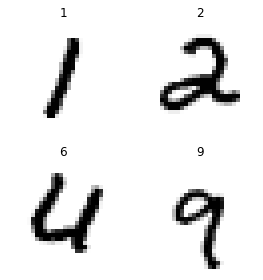

In [23]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

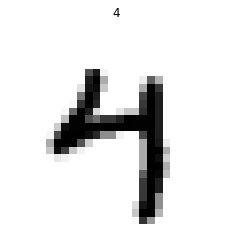

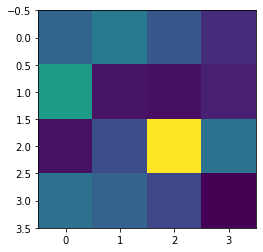

In [24]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()